# Introduction

**Brazilian E-Commerce Public Dataset by Olist
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.**

**This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.**

In [3]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
# Step 2: Load the CSV files directly from your working directory (Optimized chunk loading)
def load_in_chunks(file_path, chunk_size=100000):
    chunks = []
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)
    
# Load the CSV files directly from your working directory
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')  # Product category translations
order_payments = pd.read_csv('olist_order_payments_dataset.csv')  # Order payment details
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')  # Customer reviews of orders
orders = pd.read_csv('olist_orders_dataset.csv')  # Order details
products = pd.read_csv('olist_products_dataset.csv')  # Product details
sellers = pd.read_csv('olist_sellers_dataset.csv')  # Seller information
geolocation = pd.read_csv('olist_geolocation_dataset.csv')  # Geolocation data for customers
order_items = pd.read_csv('olist_order_items_dataset.csv')  # Items in each order
customers = pd.read_csv('olist_customers_dataset.csv')  # Customer information

In [5]:
# Step 3: Display the first few rows of each DataFrame for verification
dfs = [product_category_name_translation, order_payments, order_reviews, orders, products, sellers, geolocation, order_items, customers]
for df in dfs:
    display(df.head())  # Display the first few rows of each DataFrame

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Step 4: Reduce memory usage by optimizing dtypes
# Optimize data types for categorical columns
def optimize_dtypes(df):
    """Optimize data types for categorical columns to save memory."""
    for col in df.select_dtypes(include=['object']).columns:  # Iterate over object type columns
        df[col] = df[col].astype('category')  # Convert to category type
    return df  # Return the optimized DataFrame

# Apply dtype optimization
product_category_name_translation = optimize_dtypes(product_category_name_translation)
order_payments = optimize_dtypes(order_payments)
order_reviews = optimize_dtypes(order_reviews)
orders = optimize_dtypes(orders)
products = optimize_dtypes(products)
sellers = optimize_dtypes(sellers)
geolocation = optimize_dtypes(geolocation)
order_items = optimize_dtypes(order_items)
customers = optimize_dtypes(customers)

In [7]:
# Step 5: Merge DataFrames (Only necessary columns to reduce memory usage)
# Define necessary columns for merging to reduce memory usage
necessary_columns = {
    'orders': ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp'],
    'order_payments': ['order_id', 'payment_sequential', 'payment_type', 'payment_value'],
    'order_reviews': ['order_id', 'review_score'],
    'order_items': ['order_id', 'product_id', 'seller_id', 'price', 'freight_value'],
    'customers': ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'],
    'products': ['product_id', 'product_category_name'],
    'sellers': ['seller_id'],
    'geolocation': ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state'],
    'product_category_name_translation': ['product_category_name', 'product_category_name_english']
}

# Merge the data using only necessary columns to reduce memory usage
merged_df = orders[necessary_columns['orders']].merge(order_payments[necessary_columns['order_payments']], on='order_id', how='left')
merged_df = merged_df.merge(order_reviews[necessary_columns['order_reviews']], on='order_id', how='left')
merged_df = merged_df.merge(order_items[necessary_columns['order_items']], on='order_id', how='left')
merged_df = merged_df.merge(customers[necessary_columns['customers']], on='customer_id', how='left')
merged_df = merged_df.merge(products[necessary_columns['products']], on='product_id', how='left')
merged_df = merged_df.merge(sellers[necessary_columns['sellers']], on='seller_id', how='left')
merged_df = merged_df.merge(geolocation[necessary_columns['geolocation']], left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
merged_df = merged_df.merge(product_category_name_translation[necessary_columns['product_category_name_translation']], on='product_category_name', how='left')


In [8]:
# Step 6: Initial Data Exploration and Cleaning
print("Data Overview:")
print("Shape of merged data:", merged_df.shape)  # Display the shape of the merged DataFrame
print("Column Info:")
merged_df.info()  # Display information about the DataFrame including data types and non-null counts

Data Overview:
Shape of merged data: (18188958, 23)
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18188958 entries, 0 to 18188957
Data columns (total 23 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       object  
 1   customer_id                    category
 2   order_status                   category
 3   order_purchase_timestamp       category
 4   payment_sequential             float64 
 5   payment_type                   category
 6   payment_value                  float64 
 7   review_score                   float64 
 8   product_id                     category
 9   seller_id                      category
 10  price                          float64 
 11  freight_value                  float64 
 12  customer_unique_id             category
 13  customer_zip_code_prefix       int64   
 14  customer_city                  category
 15  customer_state                 category
 16  produ

In [9]:
# Check for missing values in the merged DataFrame
missing_values = merged_df.isnull().sum()  # Count missing values for each column
print("Missing values in each column: \n", missing_values[missing_values > 0])  # Display columns with missing values

Missing values in each column: 
 payment_sequential                 1035
payment_type                       1035
payment_value                      1035
review_score                     143939
product_id                       124697
seller_id                        124697
price                            124697
freight_value                    124697
product_category_name            385842
geolocation_zip_code_prefix         322
geolocation_lat                     322
geolocation_lng                     322
geolocation_city                    322
geolocation_state                   322
product_category_name_english    389565
dtype: int64


In [10]:
# Calculate missing values and their percentage
missing_percentage = (missing_values / len(merged_df)) * 100  # Calculate the percentage of missing values
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})  # Create a DataFrame for missing values
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))  # Display missing values sorted by percentage

                               Missing Values  Percentage
product_category_name_english          389565    2.141766
product_category_name                  385842    2.121298
review_score                           143939    0.791354
product_id                             124697    0.685564
seller_id                              124697    0.685564
price                                  124697    0.685564
freight_value                          124697    0.685564
payment_sequential                       1035    0.005690
payment_type                             1035    0.005690
payment_value                            1035    0.005690
geolocation_zip_code_prefix               322    0.001770
geolocation_lat                           322    0.001770
geolocation_lng                           322    0.001770
geolocation_city                          322    0.001770
geolocation_state                         322    0.001770


In [11]:
# Fill or drop missing values as required
# Example: Fill missing numerical columns with median, categorical with mode
# Fill missing numerical columns with the median
for col in merged_df.select_dtypes(include=['float64', 'int64']).columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

# Fill missing categorical columns with the mode
for col in merged_df.select_dtypes(include=['object']).columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])


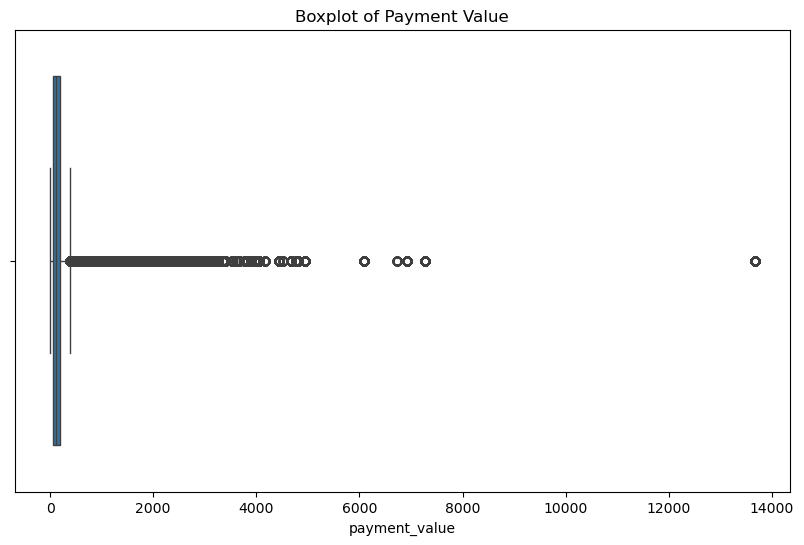

In [12]:
# Box plot for visualizing payment value distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['payment_value'])  # Create a boxplot for payment values
plt.title('Boxplot of Payment Value')  # Title of the plot
plt.show()  # Display the plot

In [13]:
# Step 7: Outlier Detection and Removal
from scipy.stats import zscore  # Import zscore for outlier detection

numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()  # List of numerical columns
z_scores = zscore(merged_df[numerical_cols])  # Calculate z-scores for numerical columns
abs_z_scores = np.abs(z_scores)  # Get absolute z-scores
merged_df = merged_df[(abs_z_scores < 3).all(axis=1)]  # Remove rows with z-scores greater than 3 (outliers)


In [14]:
# Calculate the Interquartile Range (IQR) for further outlier removal
Q1 = merged_df[numerical_cols].quantile(0.25)  # 25th percentile
Q3 = merged_df[numerical_cols].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Removing outliers
merged_df = merged_df[~((merged_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (merged_df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [15]:
# Step 8: Descriptive Statistics
print("Numerical columns statistics:")
display(merged_df.describe())    # Display statistics for numerical columns
print("Categorical columns statistics:")
display(merged_df.describe(include=['object']))   # Display statistics for categorical columns

Numerical columns statistics:


,payment_sequential,payment_value,review_score,price,freight_value,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,9459352.0,9.459352e+06,9.459352e+06,9.459352e+06,9.459352e+06,9.459352e+06,9.459352e+06,9.459352e+06,9.459352e+06
mean,1.0,1.059813e+02,4.602505e+00,7.674270e+01,1.507764e+01,1.966774e+04,1.966703e+04,-2.221634e+01,-4.537639e+01
std,0.0,6.539595e+01,6.500100e-01,5.289725e+01,4.556304e+00,1.095874e+04,1.095691e+04,1.623724e+00,2.180081e+00
min,1.0,0.000000e+00,3.000000e+00,8.500000e-01,4.310000e+00,1.003000e+03,1.003000e+03,-2.547579e+01,-5.306238e+01
25%,1.0,5.500000e+01,4.000000e+00,3.500000e+01,1.217000e+01,1.105500e+04,1.105500e+04,-2.351185e+01,-4.678106e+01
50%,1.0,9.088000e+01,5.000000e+00,5.990000e+01,1.510000e+01,1.928000e+04,1.928000e+04,-2.290480e+01,-4.629768e+01
75%,1.0,1.439800e+02,5.000000e+00,1.059000e+02,1.785000e+01,2.910100e+04,2.910100e+04,-2.101828e+01,-4.335714e+01
max,1.0,3.543300e+02,5.000000e+00,2.549000e+02,2.820000e+01,7.340200e+04,6.851600e+04,-1.656903e+01,-3.908837e+01


Categorical columns statistics:


,order_id,product_category_name
count,9459352,9459352
unique,50182,72
top,e699db09ff2550edf641974c32caab55,cama_mesa_banho
freq,4728,1197898


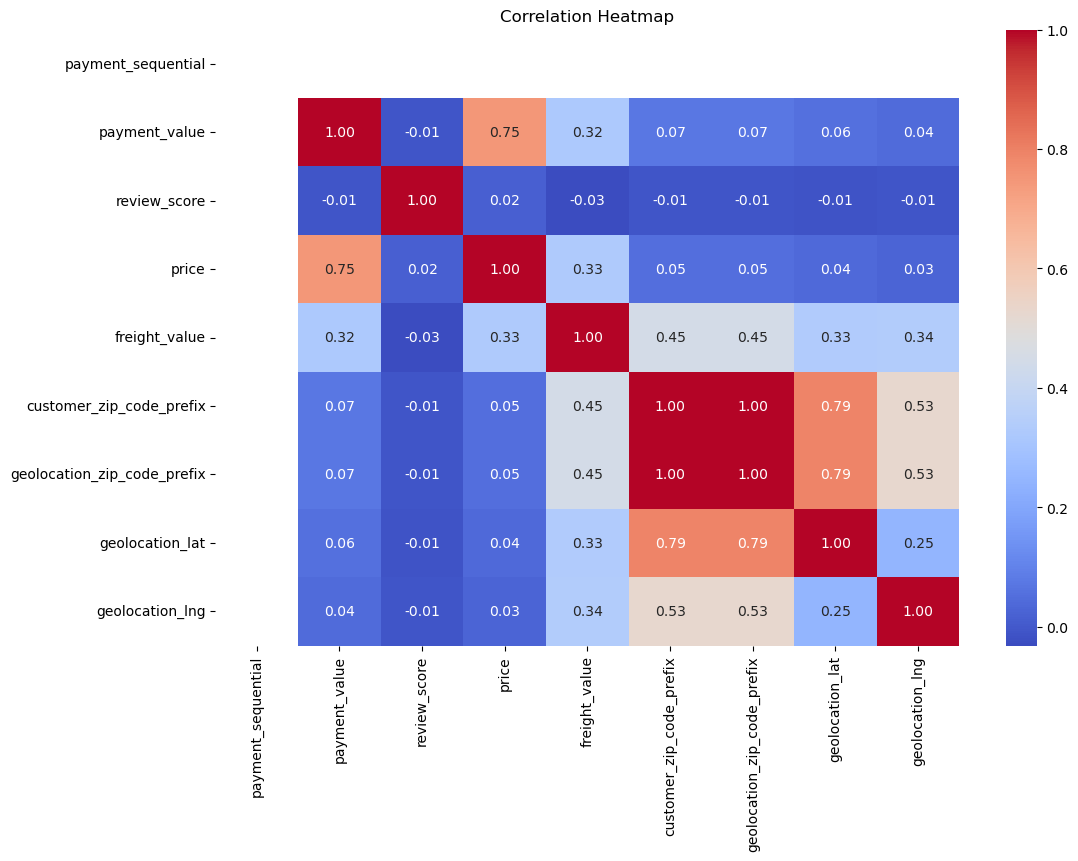

In [16]:
# Step 9: Data Visualization
# Correlation heatmap for numerical columns
numerical_cols = merged_df.select_dtypes(include=['number']).columns  # Selecting only numeric columns
numerical_data = merged_df[numerical_cols]  # Filter DataFrame with numeric columns

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")   # Create a heatmap for correlation
plt.title('Correlation Heatmap')   # Title of the heatmap
plt.show()  # Display the heatmap


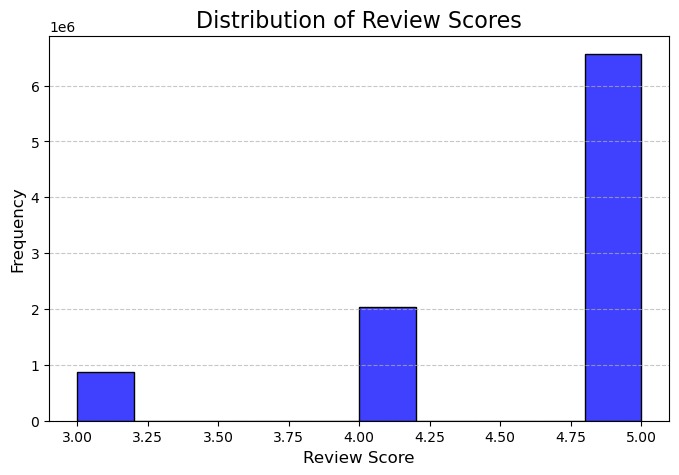

In [17]:
# Distribution of review_score
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['review_score'], bins=10, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

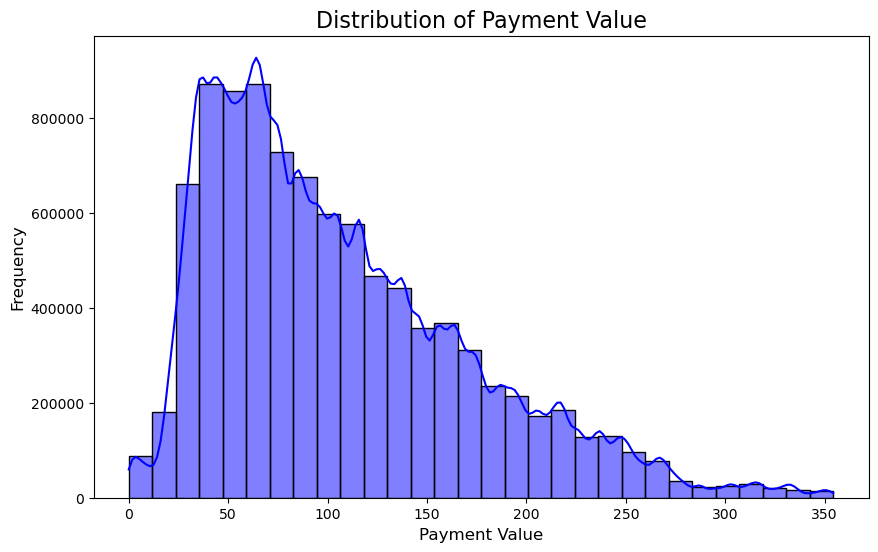

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for payment_value distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['payment_value'], bins=30, kde=True, color='blue')
plt.title('Distribution of Payment Value', fontsize=16)
plt.xlabel('Payment Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


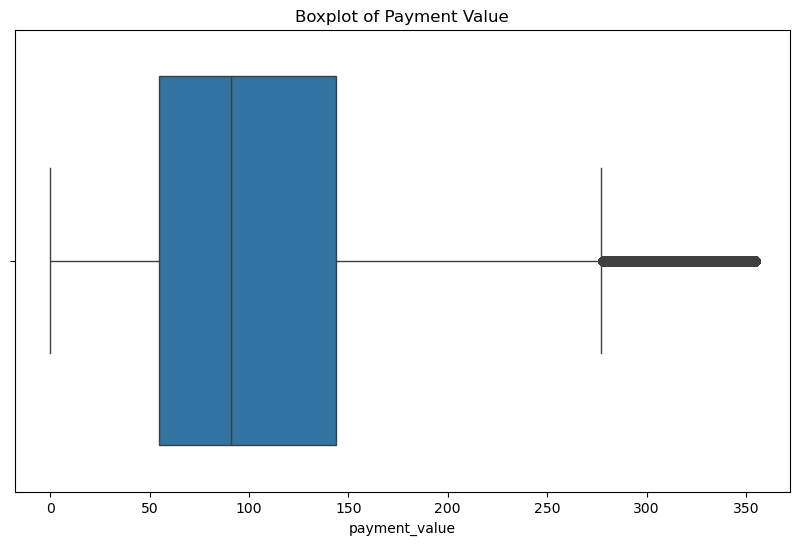

In [19]:
# Box plot for payment value (already done above, but included here for clarity)
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['payment_value'])  # Create a boxplot for payment values
plt.title('Boxplot of Payment Value')  # Title of the plot
plt.show()  # Display the plot

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14644\2246463488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='customer_state', y='days_since_purchase', data=merged_df, palette='viridis')


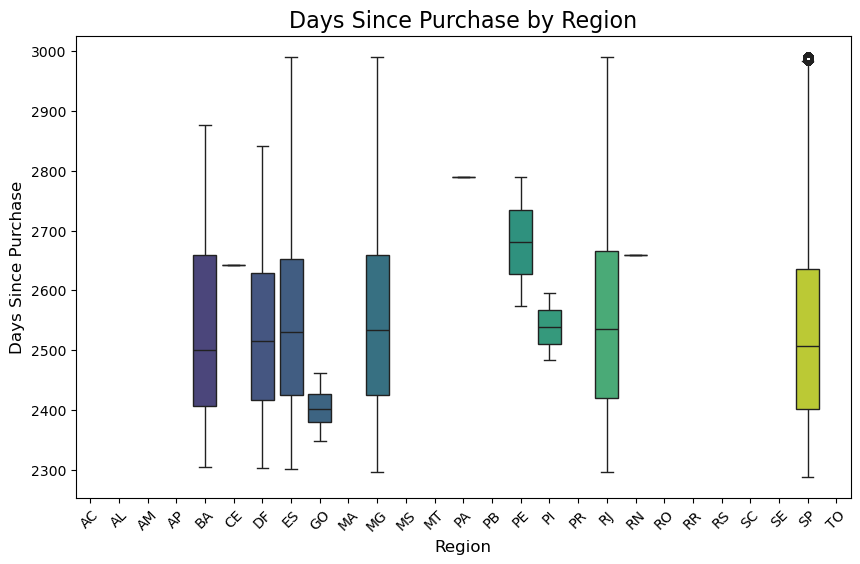

In [20]:
# Ensure timestamps are properly converted
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], errors='coerce')

# Example alternative: Days since purchase
merged_df['days_since_purchase'] = (pd.Timestamp.now() - merged_df['order_purchase_timestamp']).dt.days

# Boxplot for days since purchase (alternative visualization)
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_state', y='days_since_purchase', data=merged_df, palette='viridis')
plt.title('Days Since Purchase by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Days Since Purchase', fontsize=12)
plt.xticks(rotation=45)
plt.show()


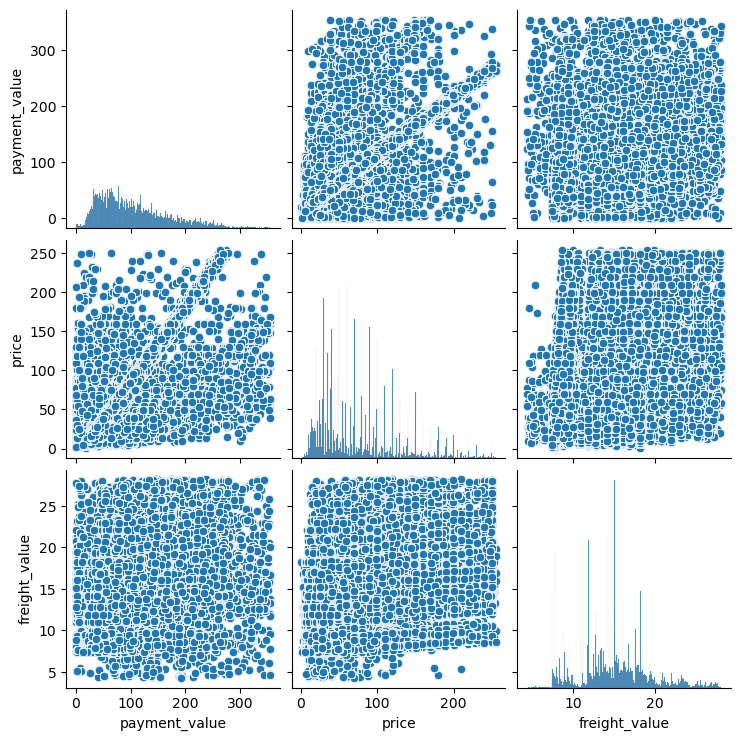

In [21]:
# Pair plot for visualizing relationships between selected numerical features
sns.pairplot(merged_df[['payment_value', 'price', 'freight_value']])  # Create a pair plot for selected numerical features
plt.show()  # Display the pair plot

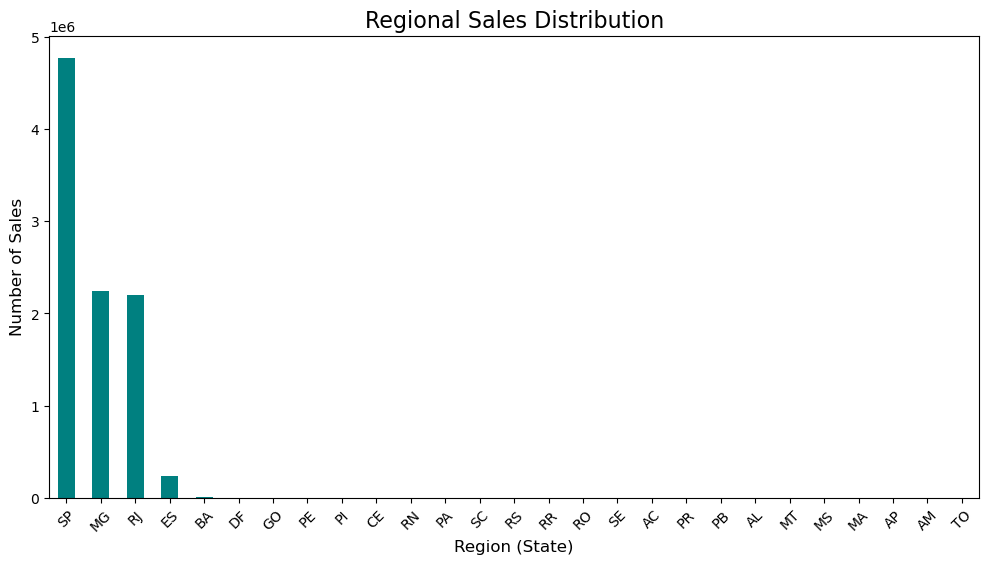

In [22]:
# Bar plot for sales distribution across regions
region_sales = merged_df['customer_state'].value_counts()

plt.figure(figsize=(12, 6))
region_sales.plot(kind='bar', color='teal')
plt.title('Regional Sales Distribution', fontsize=16)
plt.xlabel('Region (State)', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

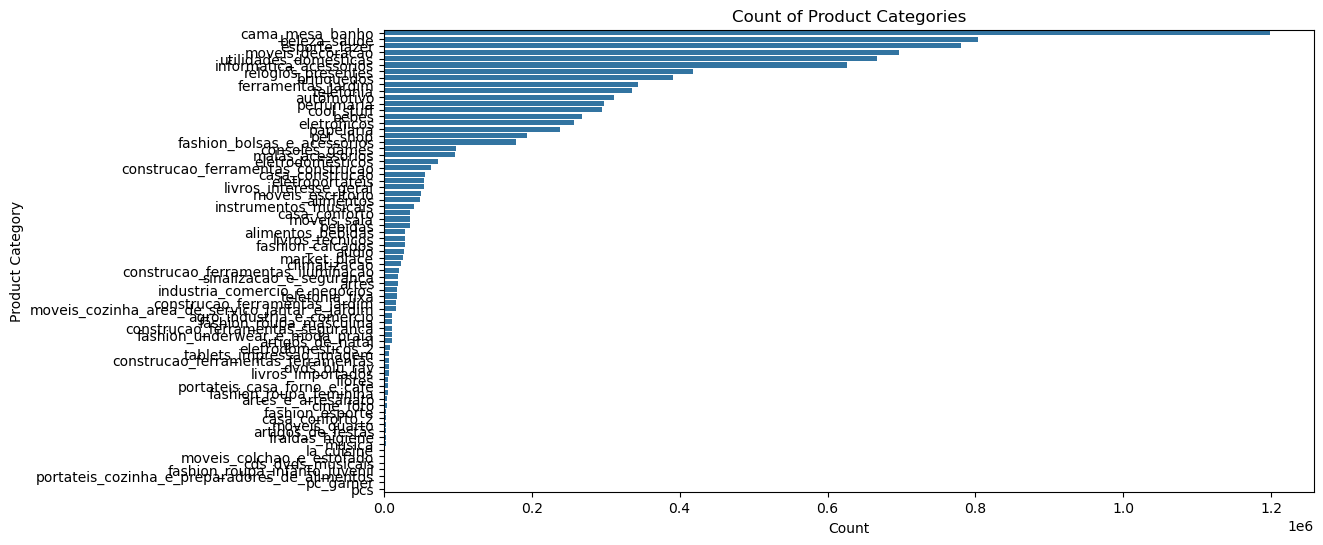

In [23]:
# Univariate Analysis - Count plot for product category names
plt.figure(figsize=(12, 6))
sns.countplot(y='product_category_name', data=merged_df, order=merged_df['product_category_name'].value_counts().index)  # Count plot for product categories
plt.title('Count of Product Categories')  # Title of the plot
plt.xlabel('Count')  # X-axis label
plt.ylabel('Product Category')  # Y-axis label
plt.show()  # Display the plot

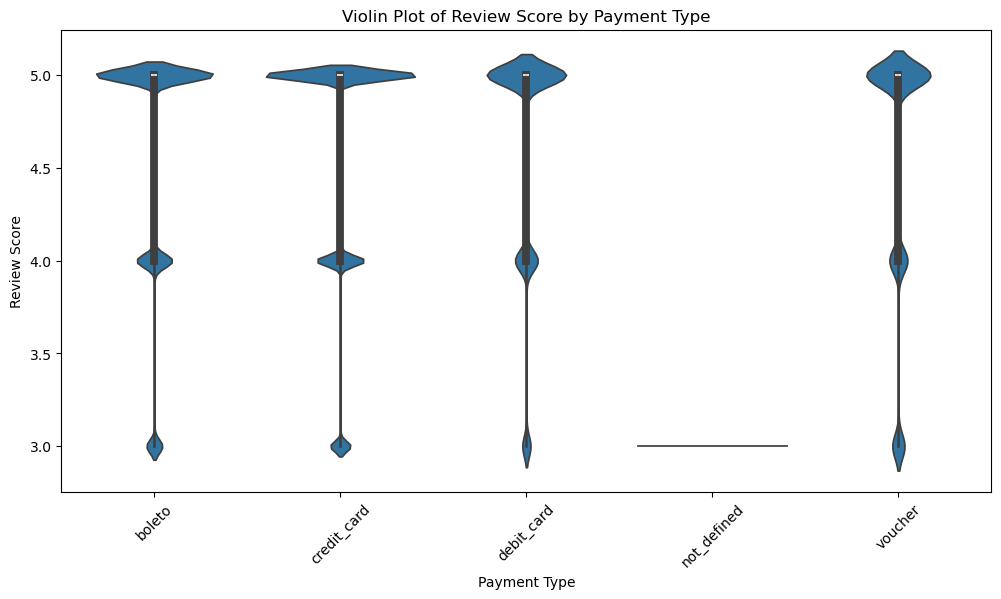

In [24]:
# Bivariate Analysis - Violin plot for review score by payment type
plt.figure(figsize=(12, 6))
sns.violinplot(x='payment_type', y='review_score', data=merged_df)  # Create a violin plot for review scores by payment type
plt.title('Violin Plot of Review Score by Payment Type')  # Title of the plot
plt.xlabel('Payment Type')  # X-axis label
plt.ylabel('Review Score')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

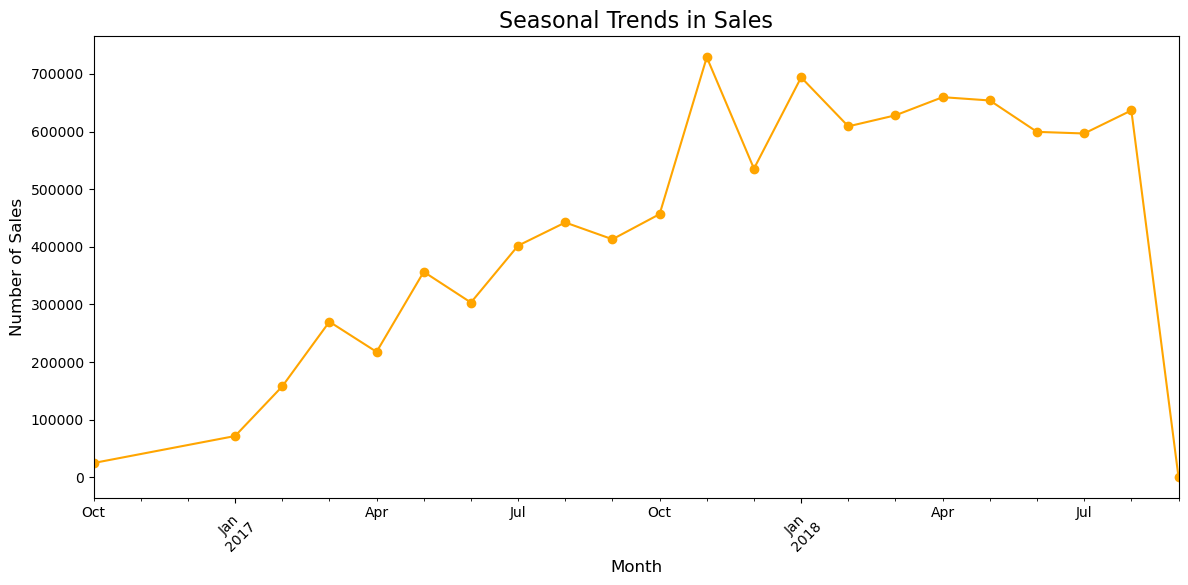

In [25]:
# Extracting review creation date as a time-series
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], errors='coerce')
merged_df['order_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

# Line plot for monthly sales trends
plt.figure(figsize=(14, 6))
merged_df['order_month'].value_counts().sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Seasonal Trends in Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14644\4107099901.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_payment_by_region = merged_df.groupby('customer_state')['payment_value'].mean().sort_values(ascending=False)


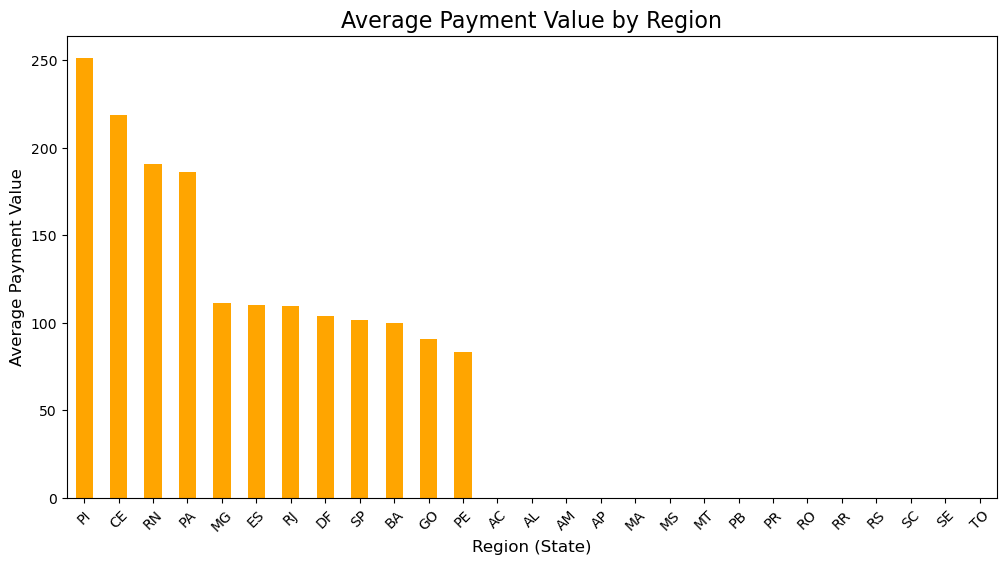

In [26]:
# Average payment_value by region
avg_payment_by_region = merged_df.groupby('customer_state')['payment_value'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_payment_by_region.plot(kind='bar', color='orange')
plt.title('Average Payment Value by Region', fontsize=16)
plt.xlabel('Region (State)', fontsize=12)
plt.ylabel('Average Payment Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()


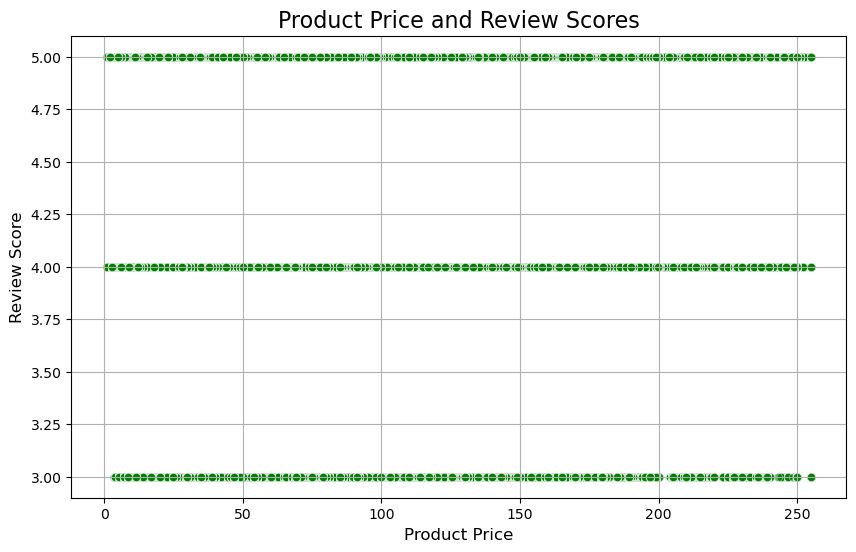

In [27]:
# Scatter plot for product price vs review_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='price', y='review_score', alpha=0.6, color='green')
plt.title('Product Price and Review Scores', fontsize=16)
plt.xlabel('Product Price', fontsize=12)
plt.ylabel('Review Score', fontsize=12)
plt.grid(True)
plt.show()

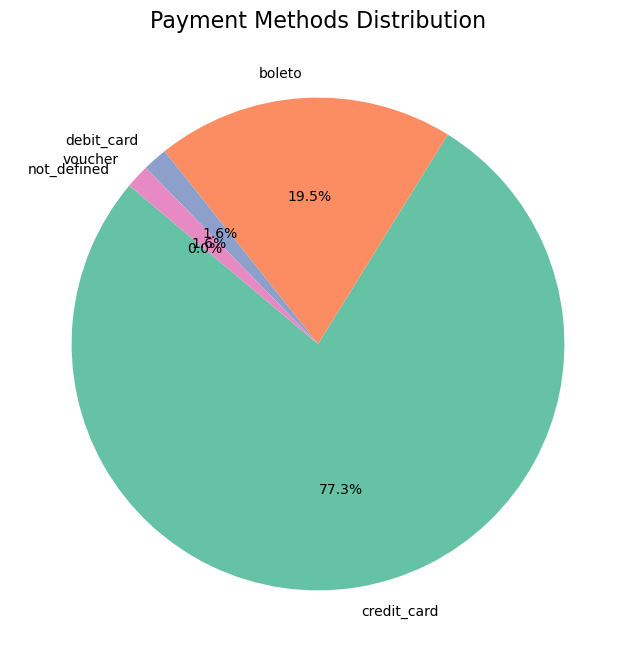

In [28]:
# Payment Methods Usage
payment_counts = merged_df['payment_type'].value_counts()
plt.figure(figsize=(8, 8))
payment_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
plt.title('Payment Methods Distribution', fontsize=16)
plt.ylabel('')  # Remove y-label for aesthetics
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14644\3087807738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


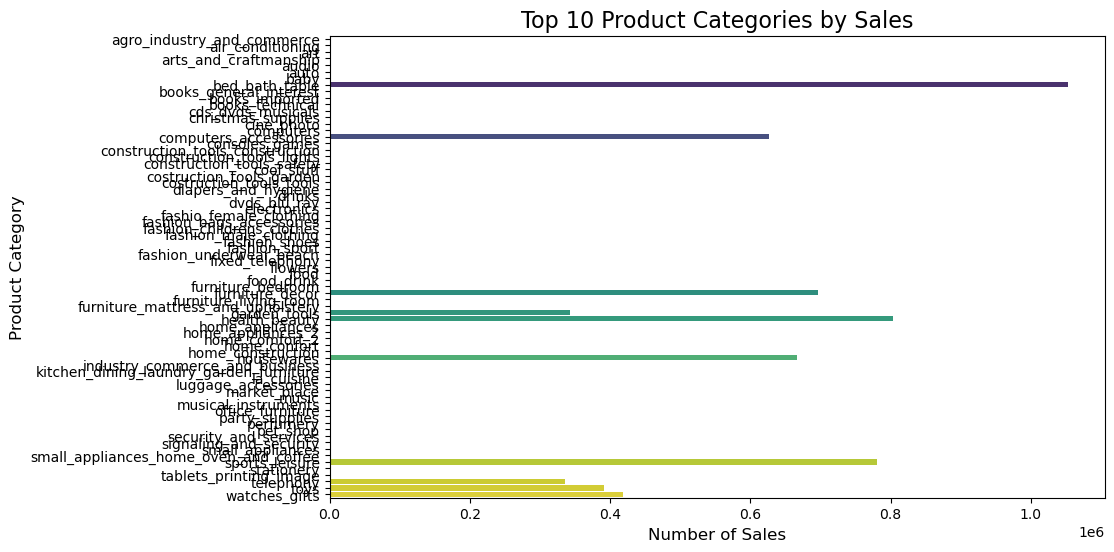

In [29]:
# Sales Distribution by Product Categories
category_counts = merged_df['product_category_name_english'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top 10 Product Categories by Sales', fontsize=16)
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()


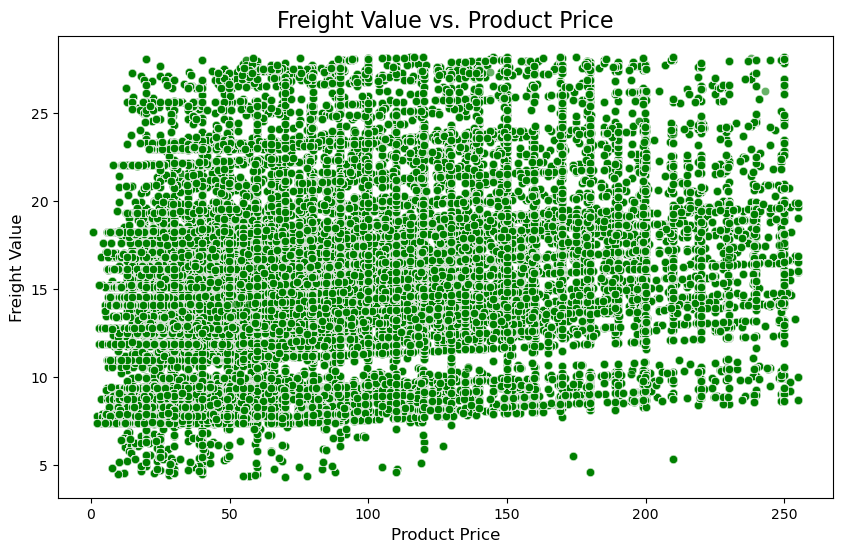

In [30]:
# Freight Value vs Product Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='freight_value', data=merged_df, alpha=0.6, color='green')
plt.title('Freight Value vs. Product Price', fontsize=16)
plt.xlabel('Product Price', fontsize=12)
plt.ylabel('Freight Value', fontsize=12)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14644\3644904620.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='days_since_purchase', data=merged_df, palette='coolwarm')


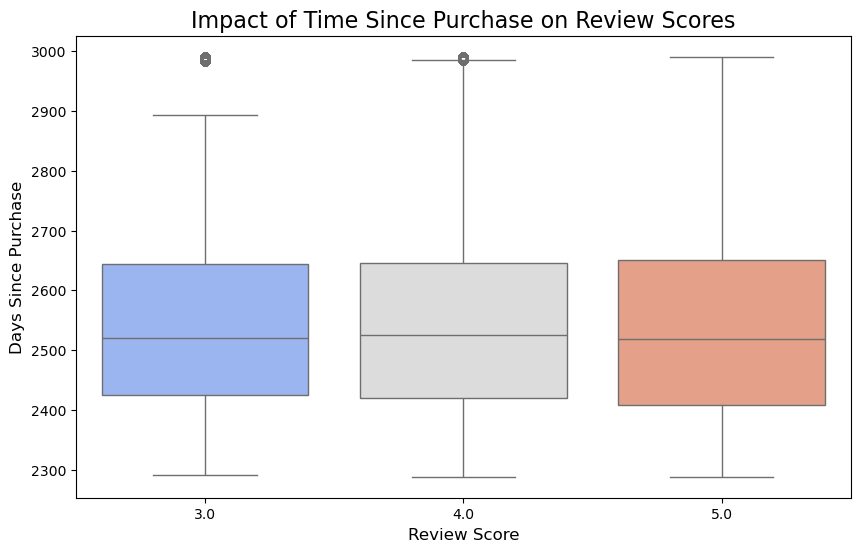

In [31]:
# Ensure 'review_score' is treated as a categorical variable for boxplot
merged_df['review_score'] = merged_df['review_score'].astype('category')

# Boxplot for days since purchase and review scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='days_since_purchase', data=merged_df, palette='coolwarm')
plt.title('Impact of Time Since Purchase on Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Days Since Purchase', fontsize=12)
plt.show()


## Reduce Memory Usage

In [33]:
# Step 10: Reduce Memory Usage
def reduce_memory_usage(df):
    """Reduce memory usage by downcasting numerical columns and converting object columns to category."""
    for col in df.columns:
        col_type = df[col].dtype  # Get the data type of the column
        if col_type in ['float64', 'float32']:
            df[col] = pd.to_numeric(df[col], downcast='float')  # Downcast float columns
        elif col_type in ['int64', 'int32']:
            df[col] = pd.to_numeric(df[col], downcast='integer')  # Downcast integer columns
        elif col_type == 'object':
            df[col] = df[col].astype('category')  # Convert object columns to category
    return df  # Return the reduced DataFrame

# Apply memory reduction to the merged DataFrame
merged_df = reduce_memory_usage(merged_df)

In [34]:
# Feature engineering - Extracting month and weekday from order purchase timestamp
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])  # Convert to datetime
merged_df['order_month'] = merged_df['order_purchase_timestamp'].dt.month  # Extract month
merged_df['order_weekday'] = merged_df['order_purchase_timestamp'].dt.weekday  # Extract weekday

In [35]:
# Step 11: Data Preprocessing - Label Encoding for categorical variables
label_encoder = LabelEncoder()  # Initialize the label encoder
for col in merged_df.select_dtypes(include=['object']).columns:  # Iterate over object type columns
    merged_df[col] = label_encoder.fit_transform(merged_df[col])  # Encode categorical columns

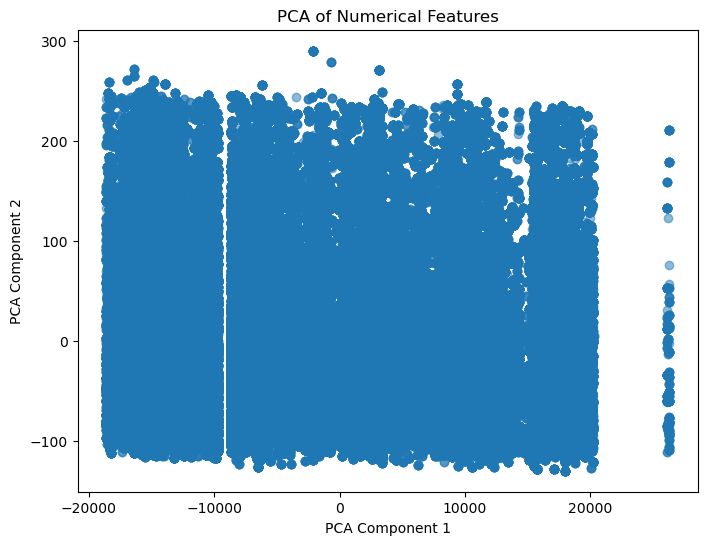

In [36]:
# Sample 10% of the data for further analysis
sampled_data = merged_df.sample(frac=0.1, random_state=42)  # Use 10% of the data for sampling

# List of numerical columns for PCA
numerical_cols = sampled_data.select_dtypes(include=['float32', 'float64']).columns

# Step 12: Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
pca = PCA(n_components=2)  # Set number of components to 2 for visualization
pca_result = pca.fit_transform(sampled_data[numerical_cols])  # Fit PCA on the sampled data

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)  # Scatter plot of PCA results
plt.title('PCA of Numerical Features')  # Title of the plot
plt.xlabel('PCA Component 1')  # X-axis label
plt.ylabel('PCA Component 2')  # Y-axis label
plt.show()  # Display the plot

In [37]:
from sklearn.preprocessing import LabelEncoder

# Label encoding categorical columns
label_columns = ['payment_type', 'product_category_name']  # List of categorical columns
le = LabelEncoder()

for col in label_columns:
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))


In [38]:
chunk_size = 1_000_000  # Number of rows per chunk
for i in range(0, len(merged_df), chunk_size):
    chunk = merged_df.iloc[i:i + chunk_size]
    # Apply transformations to each chunk


In [39]:
from sklearn.preprocessing import LabelEncoder

label_columns = ['payment_type', 'product_category_name']
le = LabelEncoder()
for col in label_columns:
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))


In [40]:
print(merged_df[['payment_type', 'product_category_name']].dtypes)
print(merged_df[['payment_type', 'product_category_name']].head())

payment_type             int32
product_category_name    int32
dtype: object
   payment_type  product_category_name
0             1                     69
1             1                     69
2             1                     69
3             1                     69
4             1                     69


In [41]:
# Convert 'payment_type' and 'product_category_name' to strings
merged_df['payment_type'] = merged_df['payment_type'].astype(str)
merged_df['product_category_name'] = merged_df['product_category_name'].astype(str)

# Verify the changes
print(merged_df[['payment_type', 'product_category_name']].dtypes)
print(merged_df[['payment_type', 'product_category_name']].head())


payment_type             object
product_category_name    object
dtype: object
  payment_type product_category_name
0            1                    69
1            1                    69
2            1                    69
3            1                    69
4            1                    69


In [42]:
from scipy.sparse import hstack
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Step 1: Ensure merged_df has the necessary data
# Assuming 'merged_df' is already defined and contains the columns 'payment_type' and 'product_category_name'.

# Convert categorical columns to strings for consistency
merged_df['payment_type'] = merged_df['payment_type'].astype(str)
merged_df['product_category_name'] = merged_df['product_category_name'].astype(str)

# Step 2: One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=True)
encoded_features = encoder.fit_transform(merged_df[['payment_type', 'product_category_name']])

# Step 3: Drop non-numeric columns and convert the rest to numeric
dense_features_df = merged_df.drop(['payment_type', 'product_category_name'], axis=1)

# Ensure all columns are numeric
dense_features_df = dense_features_df.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 (or another appropriate default)
dense_features_df = dense_features_df.fillna(0)

# Convert to NumPy array
dense_features = dense_features_df.values

# Step 4: Combine sparse encoded features with dense features
sparse_matrix = hstack([dense_features, encoded_features])

# Step 5: Output the shape of the combined matrix
print(sparse_matrix.shape)


(9459352, 101)


In [43]:
print(merged_df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'payment_sequential', 'payment_type', 'payment_value', 'review_score',
       'product_id', 'seller_id', 'price', 'freight_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state',
       'product_category_name_english', 'days_since_purchase', 'order_month',
       'order_weekday'],
      dtype='object')


In [44]:
# Import necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


# Step 1: Sampling the data to a smaller size (e.g., 2% of the dataset)
sampled_df = merged_df.sample(frac=0.02, random_state=42)  # Smaller sample size for faster computation

# Step 2: Ensure all necessary columns are available
numerical_cols = ['price', 'freight_value']
sampled_df = sampled_df.dropna(subset=numerical_cols)  # Remove rows with missing values

# Step 3: Standardization of numerical columns
scaler = StandardScaler()
sampled_df[numerical_cols] = scaler.fit_transform(sampled_df[numerical_cols])


In [45]:
# Apply PCA
desired_components = 2  # Set the number of components you want
pca = PCA(n_components=desired_components).fit(sampled_df[['payment_value', 'price', 'freight_value']])  # Use relevant columns for PCA
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [9.9968791e-01 2.1283745e-04]


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

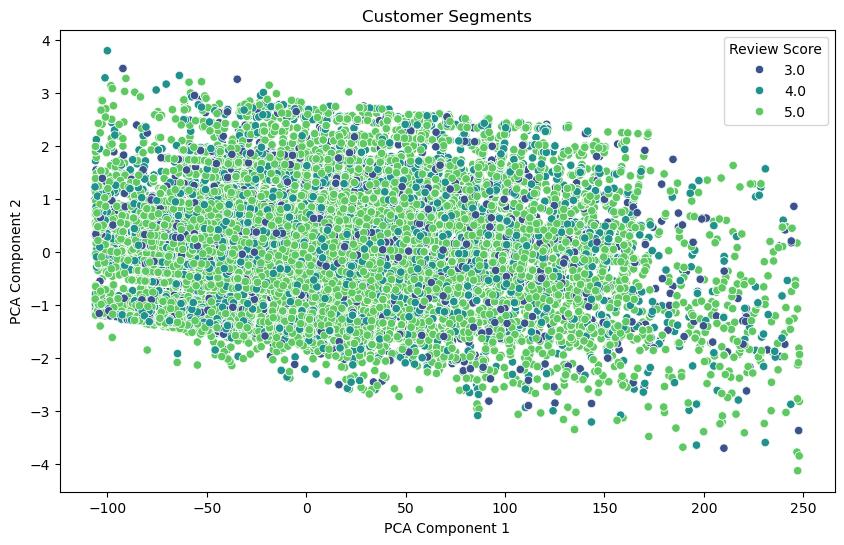

In [55]:
# Apply PCA with 2 components
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_features = pca.fit_transform(sampled_df[['payment_value', 'price', 'freight_value']])

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=sampled_df['review_score'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Review Score')
plt.show()


In [51]:
# Step 12: Conclusion and Insights
print("Project Summary:")
print("1. Merged and cleaned dataset with missing values handled and features standardized.")
print("2. Key insights from EDA and clustering:")
print("   - Visualizations provided insights on distribution and relationships within the data.")
print("   - Clustering identified customer segments, useful for targeted marketing.")

Project Summary:
1. Merged and cleaned dataset with missing values handled and features standardized.
2. Key insights from EDA and clustering:
   - Visualizations provided insights on distribution and relationships within the data.
   - Clustering identified customer segments, useful for targeted marketing.
